In [1]:
# Helper libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Deep Learning Package - Tensorflow & Keras

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/dataset_dnn/images.zip

**Load and Explore the data**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/dataset_dnn/emergency_classification.csv')
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
# split the data into ind and dep variable
x = data['image_names']
y = data['emergency_or_not']

In [6]:
x.head()

,image_names
0,0.jpg
1,1.jpg
2,2.jpg
3,3.jpg
4,4.jpg


In [8]:
y.value_counts()/len(y)*100

,count
emergency_or_not,
0,57.865646
1,42.134354


In [9]:
y = data['emergency_or_not'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
#Converting to categorical value
y = to_categorical(y)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [11]:
x = data['image_names'].values
x

array(['0.jpg', '1.jpg', '2.jpg', ..., '2349.jpg', '2350.jpg', '2351.jpg'],
      dtype=object)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [13]:
y_test.shape

(471, 2)

In [14]:
# Merging image into train data
x_train1 = []

for img_name in x_train:
  img = plt.imread('/content/images/' + img_name)
  img = img/255.0
  x_train1.append(img)

x_train1 = np.array(x_train1)

In [15]:
x_train.shape

(1881,)

In [16]:
x_train1.shape

(1881, 224, 224, 3)

In [17]:
# Merging image into test data
x_test1 = []

for img_name in x_test:
  img = plt.imread('/content/images/' + img_name)
  img = img/255.0
  x_test1.append(img)

x_test1 = np.array(x_test1)

In [18]:
x_test.shape

(471,)

In [19]:
x_test1.shape

(471, 224, 224, 3)

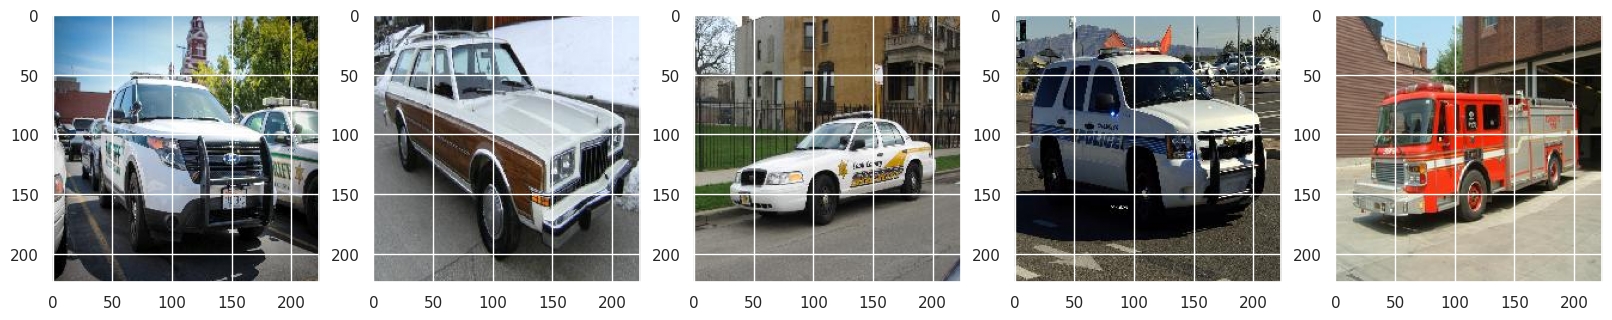

In [20]:
# give a glance at the images
fig, axes = plt.subplots(ncols=5, figsize=(20,10))
for i in range(5):
  axes[i].imshow(x_train1[i])

In [21]:
#Reshape
x_train2=x_train1.copy()
x_test2=x_test1.copy()

In [22]:

x_train1 = x_train1.reshape(1881, 224*224*3)
x_test1 = x_test1.reshape(471, 224*224*3)
x_train1 = x_train1.astype('float64')
x_test1 = x_test1.astype('float64')


# Print the final input shape ready for training
print("Train Matrix Shape :", x_train1.shape)
print("Test Matrix Shape :", x_test1.shape)
# Print the without reshape
print("Train Matrix Shape :", x_train2.shape)
print("Test Matrix Shape :", x_test2.shape)


Train Matrix Shape : (1881, 150528)
Test Matrix Shape : (471, 150528)
Train Matrix Shape : (1881, 224, 224, 3)
Test Matrix Shape : (471, 224, 224, 3)


In [23]:
pd.DataFrame(y_train).value_counts()

,,count
0,1,
1.0,0.0,1088
0.0,1.0,793


In [24]:
pd.DataFrame(y_test).value_counts()

,,count
0,1,
1.0,0.0,273
0.0,1.0,198


# Using DNN/MLP Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Define the model
model = Sequential()

# Fully Connected Layer
# 1st Hidden Layer
model.add(Dense(512, input_dim = 150528, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 2nd Hidden Layer
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fit the model
model.fit(x_train1, y_train, epochs=10, batch_size= 128, validation_data=(x_test1, y_test))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5855 - loss: 0.8522 - val_accuracy: 0.6221 - val_loss: 2.4028
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6808 - loss: 0.6548 - val_accuracy: 0.5902 - val_loss: 3.6623
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7439 - loss: 0.5876 - val_accuracy: 0.6008 - val_loss: 1.9180
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7651 - loss: 0.5432 - val_accuracy: 0.6115 - val_loss: 1.7949
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.7733 - loss: 0.5032 - val_accuracy: 0.6921 - val_loss: 0.9712
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.7974 - loss: 0.4525 - val_accuracy: 0.6030 - val_loss: 1.7620
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8116 - loss: 0.4440 - val_accuracy: 0.6476 - val_loss: 1.0426
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8690 - loss: 0.3460 - val_accuracy: 0.7495 - val_loss:

# Using CNN


## VGG16 MODEL

## Load Weights of pre-trained model

In [26]:
# creating model with pre-trained imagenet weights
base_model_vgg16 = VGG16(weights='imagenet')

In [27]:
base_model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Only CNN because I have used include_top = False
base_model_vgg16 = VGG16(weights='imagenet', input_shape=(224,224,3),include_top=False)

In [29]:
base_model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#predict
base_model_pred = base_model_vgg16.predict(x_train2)
base_model_pred_val = base_model_vgg16.predict(x_test2)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1082s 18s/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 272s 18s/step


In [31]:
# show shape of predictions
base_model_pred.shape

(1881, 7, 7, 512)

In [32]:
base_model_pred_val.shape

(471, 7, 7, 512)

In [33]:
base_model_pred = base_model_pred.reshape(1881, 7*7*512)
base_model_pred_val = base_model_pred_val.reshape(471, 7*7*512)

In [34]:
base_model_pred.shape

(1881, 25088)

In [35]:
base_model_pred_val.shape

(471, 25088)

In [36]:
# Checking the min and max of the extracted features
base_model_pred.min(), base_model_pred.max()

(0.0, 11.07413)

In [37]:
# Checking the min and max of the extracted features
base_model_pred_val.min(), base_model_pred_val.max()

(0.0, 10.976881)

In [38]:
# get maximum value from generated features
max_pred = base_model_pred.max()
max_pred_val= base_model_pred_val.max()

In [39]:
# Feature Scaling
base_model_pred = base_model_pred/max_pred
base_model_pred_val = base_model_pred_val / max_pred_val
print("Max and min value of train prediction-",base_model_pred.min(), base_model_pred.max())
print("Max and min value of train prediction-",base_model_pred_val.min(), base_model_pred_val.max())

Max and min value of train prediction- 0.0 1.0
Max and min value of train prediction- 0.0 1.0


In [40]:
#DNN MODEL
model = Sequential()
model.add(Dense(units=1024,input_dim=25088 ,activation='relu'))
model.add(Dense(units=256 ,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,970,114 (99.07 MB)

 Trainable params: 25,970,114 (99.07 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Fit the model
model.fit(base_model_pred, y_train, epochs=10, validation_data=(base_model_pred_val, y_test))

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 470ms/step - accuracy: 0.6926 - loss: 0.5328 - val_accuracy: 0.8896 - val_loss: 0.2697
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 32s 537ms/step - accuracy: 0.9462 - loss: 0.1319 - val_accuracy: 0.9130 - val_loss: 0.2270
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 43s 577ms/step - accuracy: 0.9742 - loss: 0.0804 - val_accuracy: 0.9172 - val_loss: 0.2043
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 39s 542ms/step - accuracy: 0.9915 - loss: 0.0319 - val_accuracy: 0.9193 - val_loss: 0.2995
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 32s 539ms/step - accuracy: 0.9890 - loss: 0.0287 - val_accuracy: 0.9384 - val_loss: 0.2909
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 536ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9172 - val_loss: 0.3638
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 32s 540ms/step - accuracy: 0.9985 - loss: 0.0033 - val_accuracy: 0.9236 - val_loss: 0.3386
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 38s 641ms/step - accuracy: 0.9985 - loss: 0.0020 - val_accu

## VGG19 MODEL

In [22]:
# creating model with pre-trained imagenet weights
base_model_vgg19 = VGG19(weights='imagenet')

In [23]:
base_model_vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Only CNN because I have used include_top = False
base_model_vgg19 = VGG19(weights='imagenet', input_shape=(224,224,3),include_top=False)

In [25]:
base_model_vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#predict
base_model_pred = base_model_vgg19.predict(x_train2)
base_model_pred_val = base_model_vgg19.predict(x_test2)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1364s 23s/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 338s 23s/step


In [27]:
# show shape of predictions
base_model_pred.shape

(1881, 7, 7, 512)

In [28]:
base_model_pred = base_model_pred.reshape(1881, 7*7*512)
base_model_pred_val = base_model_pred_val.reshape(471, 7*7*512)

In [29]:
# get maximum value from generated features
max_pred = base_model_pred.max()
max_pred_val= base_model_pred_val.max()

In [30]:
# Feature Scaling
base_model_pred = base_model_pred/max_pred
base_model_pred_val = base_model_pred_val / max_pred_val
print("Max and min value of train prediction-",base_model_pred.min(), base_model_pred.max())
print("Max and min value of train prediction-",base_model_pred_val.min(), base_model_pred_val.max())

Max and min value of train prediction- 0.0 1.0
Max and min value of train prediction- 0.0 1.0


In [31]:
#DNN MODEL
model = Sequential()
model.add(Dense(units=1024,input_dim=25088 ,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,970,114 (99.07 MB)

 Trainable params: 25,970,114 (99.07 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Fit the model
model.fit(base_model_pred, y_train, epochs=10, validation_data=(base_model_pred_val, y_test))

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 468ms/step - accuracy: 0.7123 - loss: 0.5578 - val_accuracy: 0.8960 - val_loss: 0.2471
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 38s 428ms/step - accuracy: 0.9268 - loss: 0.1933 - val_accuracy: 0.9130 - val_loss: 0.2065
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 418ms/step - accuracy: 0.9547 - loss: 0.1218 - val_accuracy: 0.9321 - val_loss: 0.1871
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 45s 477ms/step - accuracy: 0.9841 - loss: 0.0524 - val_accuracy: 0.9299 - val_loss: 0.2074
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 453ms/step - accuracy: 0.9953 - loss: 0.0191 - val_accuracy: 0.9299 - val_loss: 0.2128
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 459ms/step - accuracy: 0.9822 - loss: 0.0420 - val_accuracy: 0.9172 - val_loss: 0.2441
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 436ms/step - accuracy: 0.9949 - loss: 0.0205 - val_accuracy: 0.9130 - val_loss: 0.3504
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 446ms/step - accuracy: 0.9943 - loss: 0.0162 - val_accu

# ResNet50

In [25]:
# creating model with pre-trained imagenet weights
base_model_resNet50 = ResNet50(weights='imagenet')

In [26]:
base_model_resNet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [27]:
# creating model with pre-trained imagenet weights
base_model_resNet50 = ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)

In [28]:
base_model_resNet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [29]:
#predict
base_model_pred = base_model_resNet50.predict(x_train2)
base_model_pred_val = base_model_resNet50.predict(x_test2)

59/59 ━━━━━━━━━━━━━━━━━━━━ 338s 6s/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step


In [30]:
# show shape of predictions
base_model_pred.shape

(1881, 7, 7, 2048)

In [31]:
base_model_pred = base_model_pred.reshape(1881, 7*7*2048)
base_model_pred_val = base_model_pred_val.reshape(471, 7*7*2048)

In [32]:
# get maximum value from generated features
max_pred = base_model_pred.max()
max_pred_val= base_model_pred_val.max()

In [33]:
# Feature Scaling
base_model_pred = base_model_pred/max_pred
base_model_pred_val = base_model_pred_val / max_pred_val
print("Max and min value of train prediction-",base_model_pred.min(), base_model_pred.max())
print("Max and min value of train prediction-",base_model_pred_val.min(), base_model_pred_val.max())

Max and min value of train prediction- 0.0 1.0
Max and min value of train prediction- 0.0 1.0


In [34]:
model = Sequential()
model.add(Dense(units=256,input_dim=100352 ,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,706,946 (98.06 MB)

 Trainable params: 25,706,946 (98.06 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Fit the model
model.fit(base_model_pred, y_train, epochs=10, validation_data=(base_model_pred_val, y_test))

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 35s 560ms/step - accuracy: 0.5468 - loss: 0.7347 - val_accuracy: 0.6348 - val_loss: 0.6122
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 39s 532ms/step - accuracy: 0.7033 - loss: 0.5887 - val_accuracy: 0.6476 - val_loss: 0.6473
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 528ms/step - accuracy: 0.7355 - loss: 0.5388 - val_accuracy: 0.7580 - val_loss: 0.4900
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 532ms/step - accuracy: 0.7657 - loss: 0.4844 - val_accuracy: 0.6815 - val_loss: 0.6239
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 522ms/step - accuracy: 0.7334 - loss: 0.5273 - val_accuracy: 0.7473 - val_loss: 0.4902
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 529ms/step - accuracy: 0.8190 - loss: 0.4309 - val_accuracy: 0.7728 - val_loss: 0.4611
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 32s 535ms/step - accuracy: 0.8022 - loss: 0.4262 - val_accuracy: 0.7834 - val_loss: 0.4500
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 552ms/step - accuracy: 0.7950 - loss: 0.4207 - val_accu

## Comparing the model

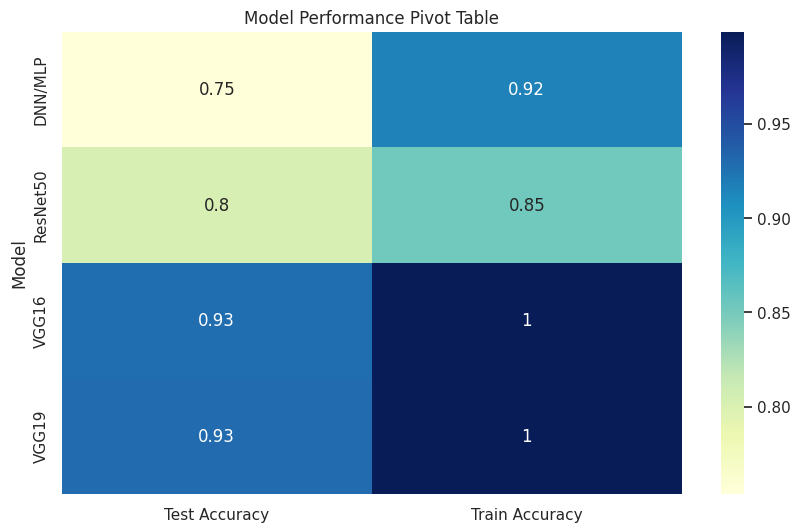

In [36]:
model_names = ['DNN/MLP','VGG16','VGG19', 'ResNet50']
train_accuracy = [0.9156, 0.9989, 0.9989, 0.8530]
test_accuracy = [0.7537, 0.9278, 0.9299, 0.8025]

df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

pivot_table = pd.pivot_table(df, values=['Train Accuracy', 'Test Accuracy'], index='Model', aggfunc=np.mean)

# create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Model Performance Pivot Table")
plt.show()

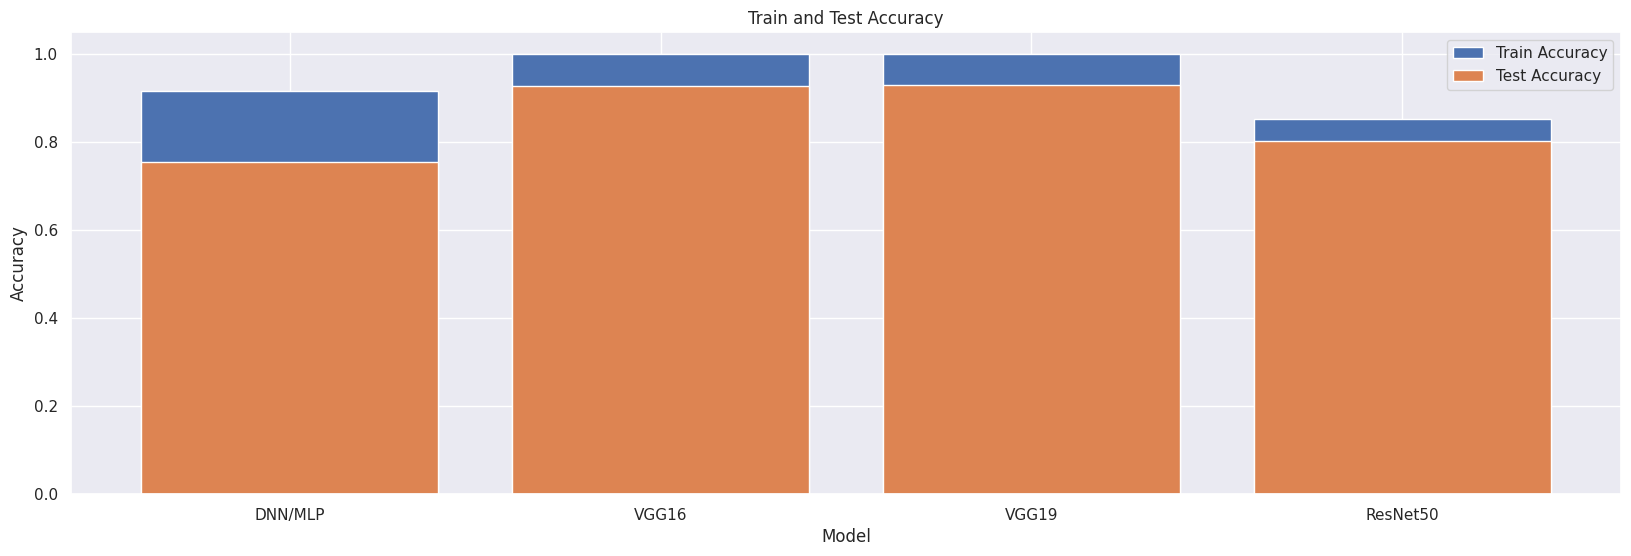

In [37]:
model_names = ['DNN/MLP','VGG16','VGG19', 'ResNet50']
train_accuracy = [0.9156, 0.9989, 0.9989, 0.8530]
test_accuracy = [0.7537, 0.9278, 0.9299, 0.8025]
# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(model_names, train_accuracy, label='Train Accuracy')
plt.bar(model_names, test_accuracy, label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()


### VGG16 and VGG19 gives almost similar and better compare to other model.